In [77]:
import streamlit as st
import pandas as pd
import plotly.express as px
import plotly.io as pio

pio.templates.default = None

from mainnet_launch.constants import AutopoolConstants, CACHE_TIME, eth_client
from mainnet_launch.constants import BAL_ETH, AUTO_ETH, AUTO_LRT
from mainnet_launch.lens_contract import get_pools_and_destinations_call, build_proxyGetDestinationSummaryStats_call
from mainnet_launch.data_fetching.get_state_by_block import get_raw_state_by_blocks, get_state_by_one_block
from mainnet_launch.destinations import DestinationDetails, get_destination_details
from mainnet_launch.data_fetching.get_state_by_block import build_blocks_to_use
from mainnet_launch.destinations import DestinationDetails, get_destination_details

destinations = [d for d in get_destination_details() if d.autopool.name == "balETH"]

2024-11-08 09:36:54.687 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 09:36:54.689 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 09:36:54.689 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 09:36:54.690 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 09:36:54.690 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [79]:
calls = []
for i, d in enumerate(destinations):
    name = d.vault_name + " " + str(i)
    call = build_proxyGetDestinationSummaryStats_call(
        name, BAL_ETH.autopool_eth_strategy_addr, d.vaultAddress, "out", 0
    )
    calls.append(call)


# first_few_blocks_with_rebalances = [20765628, 20769006, 20774007]
blocks = build_blocks_to_use()[::4]
df = get_raw_state_by_blocks(calls, blocks)

pool_and_destination_df = get_raw_state_by_blocks([get_pools_and_destinations_call()], blocks)

2024-11-08 09:37:04.900 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 09:37:04.901 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 09:37:04.901 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 09:37:04.902 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 09:37:04.903 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [86]:
df_cell = df['pxETH/wETH (balancer) 24'].values[-1]
df_cell

{'destination': '0xc4eb861e7b66f593482a3d7e8adc314f6eeda30b',
 'baseApr': 0.0,
 'feeApr': 0.001207138085204381,
 'incentiveApr': 0.0749428060091571,
 'safeTotalSupply': 7941.103574991685,
 'priceReturn': 0.000655848505393187,
 'maxDiscount': 0.001344844913896252,
 'maxPremium': 0.0,
 'ownedShares': 3490.2746063160325,
 'compositeReturn': 0.06931151199883896,
 'pricePerShare': 1.0017989086070422}

In [ ]:
# /// @inheritdoc IAutopoolStrategy
# function getDestinationSummaryStats(
#     address destAddress,
#     IAutopoolStrategy.RebalanceDirection direction,
#     uint256 amount
# ) external returns (IStrategy.SummaryStats memory) {
#     address token =
#         destAddress == address(autoPool) ? autoPool.asset() : IDestinationVault(destAddress).underlying();
#     uint256 outPrice = _getInOutTokenPriceInEth(token, destAddress);
#     return SummaryStats.getDestinationSummaryStats(
#         autoPool, systemRegistry.incentivePricing(), destAddress, outPrice, direction, amount
#     );
# }


# need the same pricing method used in the 

# /// @notice Gets the safe price of the underlying LP token
# /// @dev Price validated to be inside our tolerance against spot price. Will revert if outside.
# /// @return price Value of 1 unit of the underlying LP token in terms of the base asset
# function getValidatedSafePrice() external returns (uint256 price);


# function calculatePriceReturns(
#     IDexLSTStats.DexLSTStatsData memory stats
# ) external view returns (int256[] memory) {
#     IAutopoolStrategy strategy = IAutopoolStrategy(address(this));

#     ILSTStats.LSTStatsData[] memory lstStatsData = stats.lstStatsData;

#     uint256 numLsts = lstStatsData.length;
#     int256[] memory priceReturns = new int256[](numLsts);
#     int256 maxDiscount = strategy.maxAllowedDiscount();

#     for (uint256 i = 0; i < numLsts; ++i) {
#         ILSTStats.LSTStatsData memory data = lstStatsData[i];

#         uint256 scalingFactor = 1e18; // default scalingFactor is 1

#         int256 discount = data.discount;
#         if (discount > maxDiscount) {
#             discount = maxDiscount;
#         }

#         // discount value that is negative indicates LST price premium
#         // scalingFactor = 1e18 for premiums and discounts that are small
#         // discountTimestampByPercent holds the timestamp for 1% discount
#         uint40 discountTimestampByPercent = data.discountTimestampByPercent;

#         // 1e16 means a 1% LST discount where full scale is 1e18.
#         if ((discount > 1e16) && (discountTimestampByPercent > 0)) {
#             // linear approximation for exponential function with approx. half life of 30 days
#             uint256 halfLifeSec = 30 * 24 * 60 * 60;
#             // current timestamp should be strictly >= timestamp in discountTimestampByPercent
#             uint256 timeSinceDiscountSec = uint256(uint40(block.timestamp) - discountTimestampByPercent);
#             scalingFactor >>= (timeSinceDiscountSec / halfLifeSec);
#             // slither-disable-next-line weak-prng
#             timeSinceDiscountSec %= halfLifeSec;
#             scalingFactor -= scalingFactor * timeSinceDiscountSec / halfLifeSec / 2;
#         }
#         priceReturns[i] = discount * StrategyUtils.convertUintToInt(scalingFactor) / 1e18;
#     }

#     return priceReturns;
# }

# price return != undelrygin value - safe value




In [107]:
df.columns

Index(['ezETH-WETH-BPT (balancer) 0', 'rsETH / ETHx (balancer) 1',
       'rsETH / WETH (balancer) 2', 'ECLP-wstETH-wETH (balancer) 3',
       'ezETH-WETH-BPT (balancer) 4', 'ETHx/wstETH (balancer) 5',
       'ECLP-wstETH-cbETH (balancer) 6', 'ezETH-WETH-BPT (balancer) 7',
       'weETH/ezETH/rswETH (balancer) 8', 'weETH/ezETH/rswETH (balancer) 9',
       'rsETH / WETH (balancer) 10', 'osETH/wETH-BPT (balancer) 11',
       'ECLP-wstETH-wETH (balancer) 12', 'weETH/ezETH/rswETH (balancer) 13',
       'balETH (tokemak) 14', 'wstETH-WETH-BPT (balancer) 15',
       'pxETH/wETH (balancer) 16', 'rsETH / WETH (balancer) 17',
       'B-rETH-STABLE (balancer) 18', 'ECLP-wstETH-cbETH (balancer) 19',
       'osETH/wETH-BPT (balancer) 20', 'ETHx/wstETH (balancer) 21',
       'osETH/wETH-BPT (balancer) 22', 'B-rETH-STABLE (balancer) 23',
       'pxETH/wETH (balancer) 24', 'wstETH-WETH-BPT (balancer) 25',
       'ECLP-wstETH-wETH (balancer) 26', 'wstETH-WETH-BPT (balancer) 27',
       'ECLP-wstETH-cb

In [ ]:

pricePerShare = df.map(lambda cell: cell["pricePerShare"] if isinstance(cell, dict) else None).astype(float)
priceReturn = df.map(lambda cell: cell["priceReturn"] if isinstance(cell, dict) else None).astype(float)

col = 'weETH/rETH (balancer) 34'
price_return = priceReturn[col]
price_per_share = pricePerShare[col]

pr_df = pd.DataFrame()
pr_df['price_return'] = price_return
pr_df['price_per_share'] = price_per_share
pr_df['prior_price_per_share'] = pr_df['price_per_share'].shift(1)
# pr_df=pr_df[(pr_df.index > '10-1-2024') & (pr_df.index < '10-13-2024')].copy()
pr_df=pr_df[pr_df['price_return']!= 0].copy()
# different princin gmethids?
# what does price reutn use? safe price? 
px.scatter(pr_df,  'price_return', 'price_per_share', trendline='ols')

In [109]:
col = 'pxETH/wETH (balancer) 30'
price_return = priceReturn[col]
price_per_share = pricePerShare[col]

pr_df = pd.DataFrame()
pr_df['price_return'] = price_return
pr_df['price_per_share'] = price_per_share
pr_df['prior_price_per_share'] = pr_df['price_per_share'].shift(1)
# pr_df=pr_df[(pr_df.index > '10-1-2024') & (pr_df.index < '10-13-2024')].copy()
pr_df=pr_df[pr_df['price_return']!= 0].copy()
# different princin gmethids?
# what does price reutn use? safe price? 
px.scatter(pr_df,  'price_return', 'price_per_share', trendline='ols')

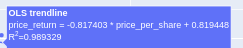

In [ ]:
# function getRangePricesLP(
#     address lpToken,
#     address pool,
#     address quoteToken
# ) external returns (uint256 spotPriceInQuote, uint256 safePriceInQuote, bool isSpotSafe) 

# use the safePrice in quote

# can we add an underlyign value function

# get undelrying value of a LST? eg the consensus layer value?

# we can't use the 



# why is this hard?

# price return != expected apriaction of the LP tokens

# 1.  price return is path dependent, if a token is at at small discount for a while then the price reutn decreases
# 2. price return cannot look at just the reserves becasue the % of tokens we have will change over time







Why is there not a linear relationshipe here?

In [ ]:
def compute_price_per_share_from_price_return(pr:float) -> float:
    return (-1.21033 * pr) + 1.00249

compute_price_per_share_from_price_return(0)
# it is not neccessilary seeded at 1


1.00249

the slope of that line is the relationship between price return and

,price_return,price_per_share,prior_price_per_share
timestamp,,,
2024-10-06 11:27:47+00:00,0.000458,1.001959,1.001968
2024-10-07 02:07:35+00:00,0.000495,1.001889,1.001959
2024-10-07 16:46:47+00:00,0.000437,1.001967,1.001889
2024-10-08 07:25:35+00:00,0.000491,1.001894,1.001967
2024-10-08 22:04:47+00:00,0.000542,1.001832,1.001894
2024-10-09 12:43:59+00:00,0.000503,1.001884,1.001832
2024-10-10 03:22:23+00:00,0.000558,1.001811,1.001884
2024-10-10 18:01:11+00:00,0.000504,1.001882,1.001811
2024-10-11 08:40:59+00:00,0.000649,1.001852,1.001882


In [ ]:
balETH_nav_per_share = pool_and_destination_df.map(lambda cell: cell["autopools"][1]["navPerShare"] / 1e18)
balETH_tvl_totalAssets = pool_and_destination_df.map(lambda cell: cell["autopools"][1]["totalAssets"] / 1e18)
balETH_tvl_totalSupply = pool_and_destination_df.map(lambda cell: cell["autopools"][1]["totalSupply"] / 1e18)

pricePerShare = df.map(lambda cell: cell["pricePerShare"] if isinstance(cell, dict) else None).astype(float)
ownedShares = df.map(lambda cell: cell["ownedShares"] if isinstance(cell, dict) else None).astype(float)
priceReturn = df.map(lambda cell: cell["priceReturn"] if isinstance(cell, dict) else None).astype(float)
destination = df.map(lambda cell: cell["destination"] if isinstance(cell, dict) else None)
tvl = (pricePerShare * ownedShares).sum(axis=1)
scaled_tvl = ((pricePerShare / (1 - priceReturn)) * ownedShares).sum(axis=1)
scaled_nav_per_share = scaled_tvl / balETH_tvl_totalSupply["getPoolsAndDestinations"]
scaled_nav_per_share

timestamp
2024-09-15 02:04:47+00:00    1.000000
2024-09-15 05:44:35+00:00    1.000000
2024-09-15 09:24:47+00:00    1.000000
2024-09-15 13:04:11+00:00    1.000000
2024-09-15 16:44:23+00:00    1.000000
                               ...   
2024-11-07 21:06:59+00:00    1.004861
2024-11-08 00:47:47+00:00    1.004821
2024-11-08 04:29:35+00:00    1.004736
2024-11-08 08:09:59+00:00    1.004717
2024-11-08 11:49:35+00:00    1.004940
Length: 357, dtype: float64

In [ ]:
pricePerShare.columns

Index(['ezETH-WETH-BPT (balancer) 0', 'rsETH / ETHx (balancer) 1',
       'rsETH / WETH (balancer) 2', 'ECLP-wstETH-wETH (balancer) 3',
       'ezETH-WETH-BPT (balancer) 4', 'ETHx/wstETH (balancer) 5',
       'ECLP-wstETH-cbETH (balancer) 6', 'ezETH-WETH-BPT (balancer) 7',
       'weETH/ezETH/rswETH (balancer) 8', 'weETH/ezETH/rswETH (balancer) 9',
       'rsETH / WETH (balancer) 10', 'osETH/wETH-BPT (balancer) 11',
       'ECLP-wstETH-wETH (balancer) 12', 'weETH/ezETH/rswETH (balancer) 13',
       'balETH (tokemak) 14', 'wstETH-WETH-BPT (balancer) 15',
       'pxETH/wETH (balancer) 16', 'rsETH / WETH (balancer) 17',
       'B-rETH-STABLE (balancer) 18', 'ECLP-wstETH-cbETH (balancer) 19',
       'osETH/wETH-BPT (balancer) 20', 'ETHx/wstETH (balancer) 21',
       'osETH/wETH-BPT (balancer) 22', 'B-rETH-STABLE (balancer) 23',
       'pxETH/wETH (balancer) 24', 'wstETH-WETH-BPT (balancer) 25',
       'ECLP-wstETH-wETH (balancer) 26', 'wstETH-WETH-BPT (balancer) 27',
       'ECLP-wstETH-cb

In [ ]:
tvl

timestamp
2024-09-15 02:04:47+00:00    1.000000e-13
2024-09-15 05:44:35+00:00    1.000000e-13
2024-09-15 09:24:47+00:00    1.000000e-13
2024-09-15 13:04:11+00:00    1.000000e-13
2024-09-15 16:44:23+00:00    1.000000e-13
                                 ...     
2024-11-07 21:06:59+00:00    4.491797e+03
2024-11-08 00:47:47+00:00    4.491961e+03
2024-11-08 04:29:35+00:00    4.492213e+03
2024-11-08 08:09:59+00:00    4.913157e+03
2024-11-08 11:49:35+00:00    4.916870e+03
Length: 357, dtype: float64

In [ ]:
# price_return = priceReturn['pxETH/wETH (balancer) 30']
# price_per_share = pricePerShare['pxETH/wETH (balancer) 30']

# df = pd.DataFrame()
# df['price_return'] = price_return
# df['price_per_share'] = price_per_share
# df['prior_price_per_share'] = df['price_per_share'].shift(1)
# price_return, current_price_per_share, _ = df.values[-200]


# price_return, current_price_per_share

(np.float64(0.000555726137776154), np.float64(1.001813335092978))

In [ ]:
price_return_0 = float(price_return)
current_price

NameError: name 'current_price' is not defined

In [ ]:
new_price_return, new_price_per_share, _ = df.values[-1]

new_price_return, new_price_per_share

(np.float64(0.0), np.float64(1.0017989086070422))

In [ ]:
px.line(df['price_return'])

In [ ]:
px.line(df['price_per_share'])

In [ ]:
df

,price_return,price_per_share,prior_price_per_share
timestamp,,,
2024-09-15 02:04:47+00:00,NaN,NaN,NaN
2024-09-15 05:44:35+00:00,NaN,NaN,NaN
2024-09-15 09:24:47+00:00,NaN,NaN,NaN
2024-09-15 13:04:11+00:00,NaN,NaN,NaN
2024-09-15 16:44:23+00:00,-0.001237,1.003816,NaN
...,...,...,...
2024-11-07 21:06:59+00:00,0.000000,1.000843,1.000863
2024-11-08 00:47:47+00:00,0.000000,1.000890,1.000843
2024-11-08 04:29:35+00:00,0.000000,1.000875,1.000890


In [ ]:
px.line(priceReturn['pxETH/wETH (balancer) 30'])

In [ ]:
px.line(pricePerShare['pxETH/wETH (balancer) 30'])

In [ ]:
tvl_df = pd.DataFrame()
tvl_df["totalAssets"] = balETH_tvl_totalAssets
tvl_df["tvl"] = tvl
tvl_df["scaled_tvl"] = scaled_tvl # this is scaled wrong
px.line(tvl_df / balETH_tvl_totalSupply.values)

In [ ]:
priceReturn

,ezETH-WETH-BPT (balancer) 0,rsETH / ETHx (balancer) 1,rsETH / WETH (balancer) 2,ECLP-wstETH-wETH (balancer) 3,ezETH-WETH-BPT (balancer) 4,ETHx/wstETH (balancer) 5,ECLP-wstETH-cbETH (balancer) 6,ezETH-WETH-BPT (balancer) 7,weETH/ezETH/rswETH (balancer) 8,weETH/ezETH/rswETH (balancer) 9,...,wstETH-WETH-BPT (balancer) 27,ECLP-wstETH-cbETH (balancer) 28,B-rETH-STABLE (balancer) 29,pxETH/wETH (balancer) 30,weETH/rETH (balancer) 31,rsETH / ETHx (balancer) 32,weETH/rETH (balancer) 33,weETH/rETH (balancer) 34,ETHx/wstETH (balancer) 35,rsETH / ETHx (balancer) 36
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-09-15 02:04:47+00:00,0.000738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000797,NaN,...,0.000196,NaN,NaN,NaN,NaN,0.001220,-0.000265,NaN,0.000961,NaN
2024-09-15 05:44:35+00:00,0.000738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000797,NaN,...,0.000195,NaN,NaN,NaN,NaN,0.001395,-0.000275,NaN,0.000961,NaN
2024-09-15 09:24:47+00:00,0.000738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000780,NaN,...,0.000192,NaN,NaN,NaN,NaN,0.000857,-0.000322,NaN,0.000626,NaN
2024-09-15 13:04:11+00:00,0.000734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000782,NaN,...,0.000195,NaN,NaN,NaN,NaN,0.000855,-0.000296,NaN,0.000634,NaN
2024-09-15 16:44:23+00:00,0.000740,NaN,NaN,NaN,NaN,0.000634,NaN,0.000740,0.000782,NaN,...,0.000195,0.001504,-0.000645,-0.001237,NaN,0.000855,-0.000302,-0.000302,0.000634,0.000855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-07 21:06:59+00:00,0.000384,0.000771,0.000604,NaN,0.000384,0.000000,NaN,0.000384,0.002064,0.002064,...,0.000153,NaN,NaN,0.000000,0.001181,0.000771,0.001181,0.000000,0.000454,0.000000
2024-11-08 00:47:47+00:00,0.000547,0.000766,0.000604,NaN,0.000547,0.000000,NaN,0.000547,0.002128,0.002128,...,0.000168,NaN,NaN,0.000000,0.001193,0.000766,0.001193,0.000000,0.000450,0.000000
2024-11-08 04:29:35+00:00,0.000394,0.000973,0.000848,NaN,0.000394,0.000000,NaN,0.000394,0.002135,0.002135,...,0.000196,NaN,NaN,0.000000,0.001216,0.000973,0.001216,0.000000,0.000450,0.000000


In [ ]:
scaled_tvl

timestamp
2024-09-15 02:04:47+00:00    1.000000e-13
2024-09-15 05:44:35+00:00    1.000000e-13
2024-09-15 09:24:47+00:00    1.000000e-13
2024-09-15 13:04:11+00:00    1.000000e-13
2024-09-15 16:44:23+00:00    1.000000e-13
                                 ...     
2024-11-07 21:06:59+00:00    4.497504e+03
2024-11-08 00:47:47+00:00    4.497213e+03
2024-11-08 04:29:35+00:00    4.497691e+03
2024-11-08 08:09:59+00:00    4.918714e+03
2024-11-08 11:49:35+00:00    4.919931e+03
Length: 357, dtype: float64

In [ ]:
scaled_nav_per_share

timestamp
2024-09-15 02:04:47+00:00    1.000000
2024-09-15 05:44:35+00:00    1.000000
2024-09-15 09:24:47+00:00    1.000000
2024-09-15 13:04:11+00:00    1.000000
2024-09-15 16:44:23+00:00    1.000000
                               ...   
2024-11-07 21:06:59+00:00    1.004861
2024-11-08 00:47:47+00:00    1.004821
2024-11-08 04:29:35+00:00    1.004736
2024-11-08 08:09:59+00:00    1.004717
2024-11-08 11:49:35+00:00    1.004940
Length: 357, dtype: float64

In [ ]:
balETH_tvl_totalSupply

,getPoolsAndDestinations
timestamp,
2024-09-15 02:04:47+00:00,1.000000e-13
2024-09-15 05:44:35+00:00,1.000000e-13
2024-09-15 09:24:47+00:00,1.000000e-13
2024-09-15 13:04:11+00:00,1.000000e-13
2024-09-15 16:44:23+00:00,1.000000e-13
...,...
2024-11-07 21:06:59+00:00,4.475749e+03
2024-11-08 00:47:47+00:00,4.475634e+03
2024-11-08 04:29:35+00:00,4.476492e+03


In [ ]:
scaled_tvl

timestamp
2024-09-15 02:04:47+00:00    1.000000e-13
2024-09-15 05:44:35+00:00    1.000000e-13
2024-09-15 09:24:47+00:00    1.000000e-13
2024-09-15 13:04:11+00:00    1.000000e-13
2024-09-15 16:44:23+00:00    1.000000e-13
                                 ...     
2024-11-07 21:06:59+00:00    4.497504e+03
2024-11-08 00:47:47+00:00    4.497213e+03
2024-11-08 04:29:35+00:00    4.497691e+03
2024-11-08 08:09:59+00:00    4.918714e+03
2024-11-08 11:49:35+00:00    4.919931e+03
Length: 357, dtype: float64

In [ ]:
scaled_nav_per_share

timestamp
2024-09-15 02:04:47+00:00    1.000000
2024-09-15 05:44:35+00:00    1.000000
2024-09-15 09:24:47+00:00    1.000000
2024-09-15 13:04:11+00:00    1.000000
2024-09-15 16:44:23+00:00    1.000000
                               ...   
2024-11-07 21:06:59+00:00    1.004861
2024-11-08 00:47:47+00:00    1.004821
2024-11-08 04:29:35+00:00    1.004736
2024-11-08 08:09:59+00:00    1.004717
2024-11-08 11:49:35+00:00    1.004940
Length: 357, dtype: float64

In [ ]:

px.line([tvl, scaled_tvl])

In [ ]:
scaled_nav_per_share

timestamp
2024-09-15 02:04:47+00:00    1.000000
2024-09-15 05:44:35+00:00    1.000000
2024-09-15 09:24:47+00:00    1.000000
2024-09-15 13:04:11+00:00    1.000000
2024-09-15 16:44:23+00:00    1.000000
                               ...   
2024-11-07 21:06:59+00:00    1.004861
2024-11-08 00:47:47+00:00    1.004821
2024-11-08 04:29:35+00:00    1.004736
2024-11-08 08:09:59+00:00    1.004717
2024-11-08 11:49:35+00:00    1.004940
Length: 357, dtype: float64

In [ ]:
nav_per_share_df = pd.DataFrame()
nav_per_share_df["balETH_actual_nav_per_share"] = balETH_nav_per_share
nav_per_share_df["balETH_scaled_nav_per_share"] = scaled_nav_per_share
px.line(nav_per_share_df)

In [ ]:
tvl  # all these values are slightly off

timestamp
2024-09-15 02:04:47+00:00    1.000000e-13
2024-09-15 05:44:35+00:00    1.000000e-13
2024-09-15 09:24:47+00:00    1.000000e-13
2024-09-15 13:04:11+00:00    1.000000e-13
2024-09-15 16:44:23+00:00    1.000000e-13
                                 ...     
2024-11-07 21:06:59+00:00    4.491797e+03
2024-11-08 00:47:47+00:00    4.491961e+03
2024-11-08 04:29:35+00:00    4.492213e+03
2024-11-08 08:09:59+00:00    4.913157e+03
2024-11-08 11:49:35+00:00    4.916870e+03
Length: 357, dtype: float64

In [ ]:
balETH_tvl_totalAssets

,getPoolsAndDestinations
timestamp,
2024-09-15 02:04:47+00:00,1.000000e-13
2024-09-15 05:44:35+00:00,1.000000e-13
2024-09-15 09:24:47+00:00,1.000000e-13
2024-09-15 13:04:11+00:00,1.000000e-13
2024-09-15 16:44:23+00:00,1.000000e-13
...,...
2024-11-07 21:06:59+00:00,4.491893e+03
2024-11-08 00:47:47+00:00,4.491893e+03
2024-11-08 04:29:35+00:00,4.492972e+03


In [ ]:
# vaultAddress	: 0x003aD6a060a1082B7A6F85d24dDF9E9E196B8426
# exchangeName	: balancer
# dexPool	: 0xf01b0684C98CD7aDA480BFDF6e43876422fa1Fc1
# lpTokenAddress	: 0xf01b0684C98CD7aDA480BFDF6e43876422fa1Fc1
# lpTokenSymbol	: ECLP-wstETH-wETH
# lpTokenName	: Gyroscope ECLP wstETH/wETH
# autopool	: {'name': 'balETH', 'autopool_eth_addr': '0x6dC3ce9C57b20131347FDc9089D740DAf6eB34c5', 'autopool_eth_strategy_addr': '0xabe104560D0B390309bcF20b73Dca335457AA32e', 'solver_rebalance_plans_bucket': 'v2-gen3-eth-mainnet-solve-v2gen3ethmainnetsolverba-wx1snhldrupb'}
# vault_name	: ECLP-wstETH-wETH (balancer),th_addr': '0x0A2b94F6871c1D7A32Fe58E1ab5e6deA2f114E56', 'autopool_eth_strategy_addr': '0xf5f6addB08c5e6091e5FdEc7326B21bEEd942235', 'solver_rebalance_plans_bucket': 'v2-gen3-eth-mainnet-solve-v2gen3ethmainnetsolverau-7ju0ra8aoznh'}

In [ ]:
call = build_proxyGetDestinationSummaryStats_call(
    "Gyroscope ECLP wstETH/wETH",
    BAL_ETH.autopool_eth_strategy_addr,
    "0x003aD6a060a1082B7A6F85d24dDF9E9E196B8426",
    "out",
    0,
)